In [1]:
from PIL import Image
import glob
import os,copy,time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


100
(100,)
/aiffel/aiffel/Explore_rock_scissor_paper/paper/paper/85.jpg <class 'str'> 85.jpg
원본이미지 (224, 224, 3)


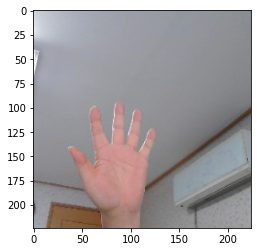

(28, 28, 3)


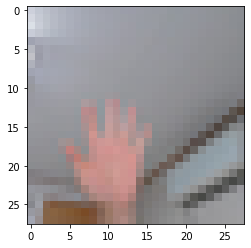

(56, 56, 3)


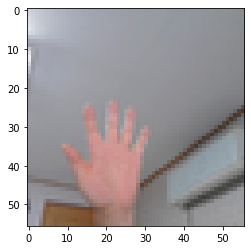

(112, 112, 3)


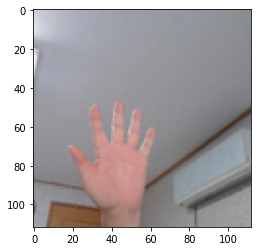

In [2]:
## Raw 사진과 img size 다른 사진과 해상도 비교
#"""
image_dir_path = "/aiffel/aiffel/Explore_rock_scissor_paper/paper/paper"
images= glob.glob(image_dir_path + "/*.jpg")  
print(len(images))
print(np.array(images).shape)
target_size1=(28,28)
target_size2=(56,56)
target_size3=(112,112)   
for img in images[-1:]:
    print(img,type(img),os.path.basename(img))
    raw_img=Image.open(img)
    print("원본이미지", np.array(raw_img).shape)
    plt.imshow(raw_img)
    plt.show()
    new_img1=raw_img.resize(target_size1,Image.ANTIALIAS)
    print(np.array(new_img1).shape)
    plt.imshow(new_img1)
    plt.show()
    new_img2=raw_img.resize(target_size2,Image.ANTIALIAS)
    print(np.array(new_img2).shape)
    plt.imshow(new_img2)
    plt.show()
    new_img3=raw_img.resize(target_size3,Image.ANTIALIAS)
    print(np.array(new_img3).shape)
    plt.imshow(new_img3)
    plt.show()
#"""    

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


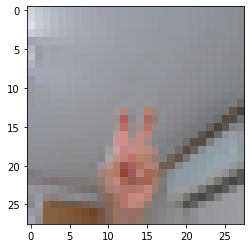

In [3]:
# resize함수에서 저장코드 삭제

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img = old_img.resize(target_size,Image.ANTIALIAS)
	plt.imshow(new_img)
	print(len(images), " images resized.")   
	return  new_img

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Explore_rock_scissor_paper/scissor/scissor"
new_img_scissor = resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


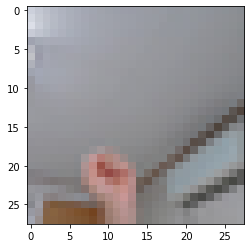

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = "/aiffel/aiffel/Explore_rock_scissor_paper/rock/rock"
images= glob.glob(image_dir_path + "/*.jpg")  
print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
	old_img=Image.open(img)
	new_img_rock=old_img.resize(target_size,Image.ANTIALIAS)
plt.imshow(new_img_rock)
print(len(images), " images resized.")

print("바위 이미지 resize 완료!")


100  images to be resized.
100  images resized.
보 이미지 resize 완료!


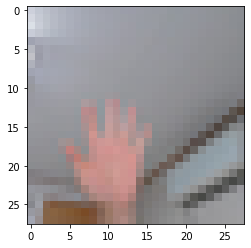

In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/Explore_rock_scissor_paper/paper/paper"
images= glob.glob(image_dir_path + "/*.jpg")  
print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
	old_img=Image.open(img)
	new_img_paper=old_img.resize(target_size,Image.ANTIALIAS)
plt.imshow(new_img_paper)    

print(len(images), " images resized.")

print("보 이미지 resize 완료!")


In [6]:
# load_data함수변경: 이미지 파일 로컬에 저장없이, 변수명 다르게 바인딩한 변수로 메모리저장분 사용

def load_data(new_img_scissor, new_img_rock, new_img_paper,img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    imgs[:100,:,:,:]= new_img_scissor    # 데이터 영역에 가위 이미지 행렬을 복사
    labels[:100]= 0   # 가위 : 0
    
    imgs[100:200,:,:,:]= new_img_rock    # 데이터 영역에 바위 이미지 행렬을 복사
    labels[100:200]= 1   # 바위 : 1
    
    imgs[200:300,:,:,:]= new_img_paper    # 데이터 영역에 보 이미지 행렬을 복사
    labels[200:300]= 2   # 보 : 2

  
    if img_path.find('test')==-1:   
        print("학습데이터(x_train)의 이미지 개수는", imgs.shape[0],"입니다.")
    else:
        print("시험데이터(x_test)의 이미지 개수는", imgs.shape[0],"입니다.") 
           
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Explore_rock_scissor_paper"

(x_train, y_train)=load_data(new_img_scissor, new_img_rock, new_img_paper, image_dir_path, number_of_data=300)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train_norm_root= x_train_norm.copy()
y_train_root= y_train.copy()


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


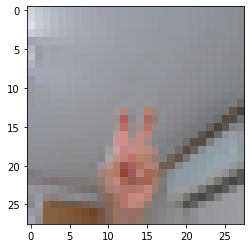

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  1


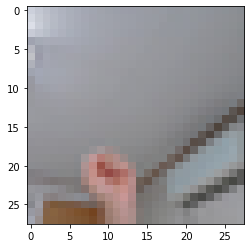

In [8]:
plt.imshow(x_train[100])
print('라벨: ', y_train[100])

라벨:  2


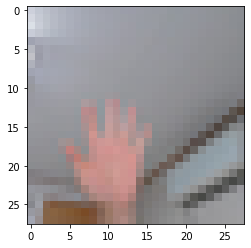

In [9]:
plt.imshow(x_train[200])
print('라벨: ', y_train[200])

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 8
n_channel_2 = 8      #128
n_dense = 8          #200
n_train_epoch = 5    #100
n_kenel = 3  
n_pool = 2

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (n_kenel,n_kenel), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D((n_pool,n_pool)))
model.add(keras.layers.Conv2D(n_channel_2, (n_kenel,n_kenel), activation='relu'))
model.add(keras.layers.MaxPooling2D((n_pool,n_pool)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 1608      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

In [11]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]'sparse_categorical_crossentropy'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련: train vs valid = 80%:20%
print(n_train_epoch)
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch, validation_split=0.20)
 

5
Epoch 1/5
8/8 [==============================] - 3s 40ms/step - loss: 1.0952 - accuracy: 0.4167 - val_loss: 1.1094 - val_accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 5ms/step - loss: 1.0847 - accuracy: 0.4167 - val_loss: 1.1194 - val_accuracy: 0.0000e+00
Epoch 3/5
8/8 [==============================] - 0s 5ms/step - loss: 1.0762 - accuracy: 0.4167 - val_loss: 1.1279 - val_accuracy: 0.0000e+00
Epoch 4/5
8/8 [==============================] - 0s 5ms/step - loss: 1.0632 - accuracy: 0.7750 - val_loss: 1.1379 - val_accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 5ms/step - loss: 1.0529 - accuracy: 0.4750 - val_loss: 1.1501 - val_accuracy: 0.0000e+00


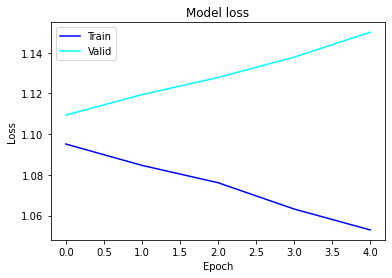

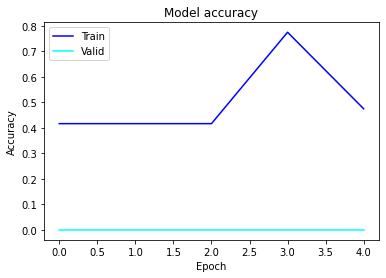

In [12]:
# 훈련 과정 시각화 (loss): train, valid
plt.plot(history.history['loss'],'blue')
plt.plot(history.history['val_loss'],'cyan')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()       

# 훈련 과정 시각화 (accuracy): train, valid
plt.plot(history.history['accuracy'],'blue')
plt.plot(history.history['val_accuracy'],'cyan')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
시험데이터(x_test)의 이미지 개수는 300 입니다.
x_test1 shape: (300, 28, 28, 3)
y_test1 shape: (300,)
라벨:  0


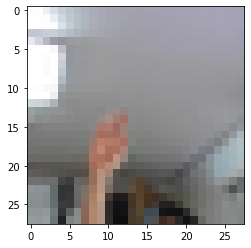

In [13]:
# x_test1, y_test1를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

# [테스트 데이터셋 2] . 조원의 데이터
image_dir_path = os.getenv("HOME") + "/aiffel/Explore_rock_scissor_paper/test_data1"
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_scissor = image_dir_path + "/scissor/scissor"
new_img_scissor = resize_images(image_dir_path_scissor)
print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_rock = image_dir_path + "/rock/rock"
new_img_rock = resize_images(image_dir_path_rock)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_paper = image_dir_path + "/paper/paper"
new_img_paper = resize_images(image_dir_path_paper)
print("보 이미지 resize 완료!")

# x_test1, y_test1  
(x_test1, y_test1)=load_data(new_img_scissor, new_img_rock, new_img_paper, image_dir_path, number_of_data=300)
x_test_norm1 = x_test1/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test1 shape: {}".format(x_test1.shape))
print("y_test1 shape: {}".format(y_test1.shape))


print('라벨: ', y_test1[0])

In [14]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm1, y_test1, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.0951 - accuracy: 0.3333
test_loss: 1.095088243484497 
test_accuracy: 0.3333333432674408


#### 1차 기본모델로 teat data 검증 결과

test_loss: 1.1581313610076904
    
test_accuracy: 0.3333333432674408
    
##### test accuracy 가 0.333으로, 식별성능이 저조하여, 아래에서 성능높이기 시도      

### [성능높이기 시도]

#### 아래의 총 6개 Hyper parameter에대해, 성능향상을 시도함

1. 'n_channel_1'
2. 'n_channel_2'
3. 'n_dense'
4. 'n_train_epoch'
5. 'n_lr'
6. 'n_optimizer'



In [15]:
### [성능 높이기시도]
# Accuracy가 적게나와서, train data 300 중 80%를 train data로, 20%를 valid data로 사용하고,\
# Hyperparam을 약식 튜닝해봄(전체를 grid search 식으로 하면 시간이 많이 소용되어,약식으로 시도)

# train, valid 분리
x_train_norm = x_train_norm_root.copy()
y_train = y_train_root.copy()

print("x_train_norm.shape",x_train_norm.shape,"y_train.shape",y_train.shape)
#x_train_norm, x_valid_norm = x_train_norm[:240],x_train_norm[240:]    
#y_train, y_valid = y_train[:240],y_train[240:]

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))
#print("x_valid_norm shape: {}".format(x_valid_norm.shape))
#print("y_valid shape: {}".format(y_valid.shape))

x_train_norm.shape (300, 28, 28, 3) y_train.shape (300,)
x_train_norm shape: (300, 28, 28, 3)
y_train shape: (300,)


In [16]:
# 바꿔 볼 수 있는 하이퍼파라미터들: 총 6개
n_channel_1_list= [8, 16, 32]  
n_channel_2_list= [16, 32, 64]
n_dense_list = [16, 32, 64] 
n_train_epoch_list = [10, 20, 30] 
n_lr_list= [0.001, 0.01] 
#옵티마이저 파람
adam = tf.keras.optimizers.Adam(learning_rate=0.001,name ='Adam')
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001,name ='RMSprop')
n_optimizer_list = [adam, rmsprop]

total_hparam_dict = {'n_channel_1':n_channel_1_list,'n_channel_2':n_channel_2_list,'n_dense':n_dense_list,'n_train_epoch':n_train_epoch_list, 'n_lr':n_lr_list, 'n_optimizer':n_optimizer_list}

# 초기 세팅
n_channel_1,n_channel_2,n_dense,n_train_epoch, n_lr, n_optimizer = 8, 8, 8, 10, 0.001, adam

# 학습및 검증 함수
def learning_with_simple_hyper_param_tuning(n_channel_1,n_channel_2,n_dense,n_train_epoch,n_lr,n_optimizer):
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_channel_1, (n_kenel,n_kenel), activation='relu', input_shape=(28,28,3)))
    model.add(keras.layers.MaxPool2D((n_pool,n_pool)))
    model.add(keras.layers.Conv2D(n_channel_2, (n_kenel,n_kenel), activation='relu'))
    model.add(keras.layers.MaxPooling2D((n_pool,n_pool)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.summary()
    # 옵티마이저
    #adam = tf.keras.optimizers.Adam(learning_rate=lr,name ='Adam')
    #rmsprop = tf.keras.optimizers.RMSprop(learning_rate=lr,name ='RMSprop')
    model.compile(optimizer=n_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # 모델 훈련
    history = model.fit(x_train_norm, y_train, epochs= int(n_train_epoch), validation_split=0.20)    
    return  model, history 

i 0 key n_channel_1 hparam_list [8, 16, 32]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1608      
_________________________________________________________________
dense_3 (D

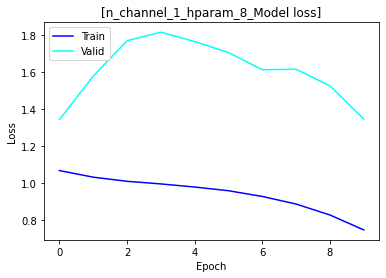

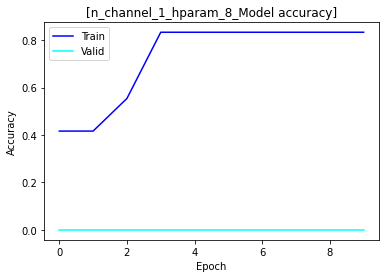

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 1608      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

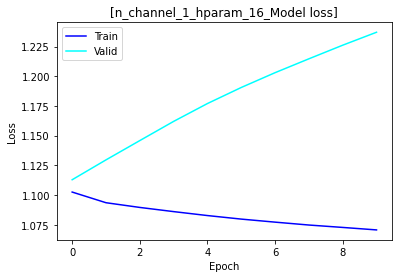

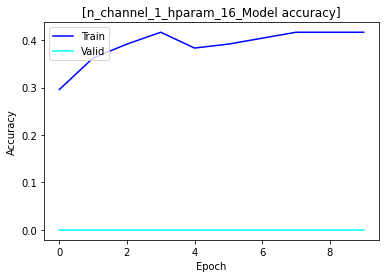

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 8)         2312      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1608      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

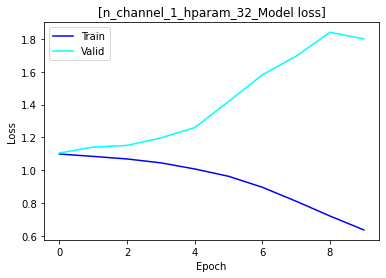

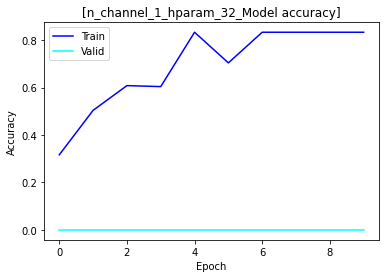

max 0.0
maxparam ['n_channel_1' 32 1.7997987270355225 0.0]
i n_channel_1 best hyperparam 32
i n_channel_1 best val_loss 1.7997987270355225
i n_channel_1 best val_accuracy 0.0
i 1 key n_channel_2 hparam_list [16, 32, 64]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
________________________________

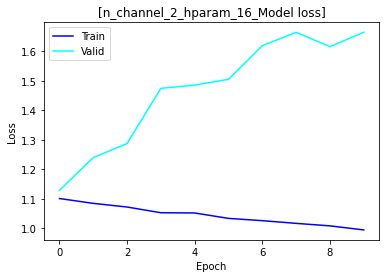

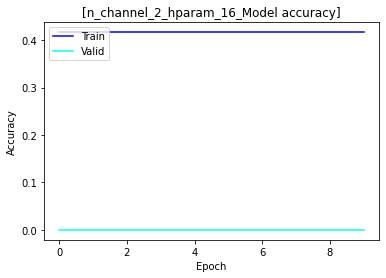

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 6408      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

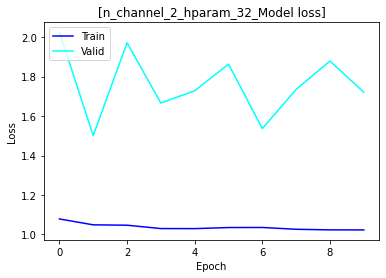

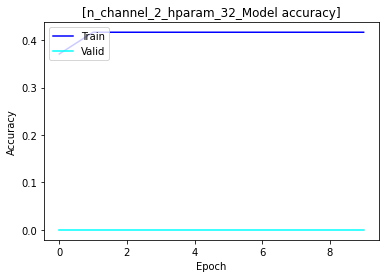

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 12808     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

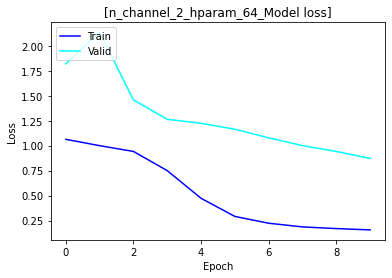

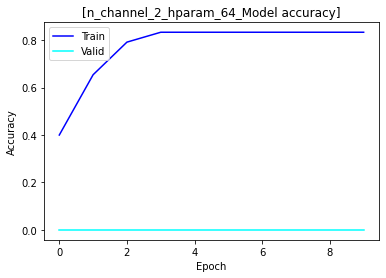

max 0.0
maxparam ['n_channel_2' 64 0.8718865513801575 0.0]
i n_channel_2 best hyperparam 64
i n_channel_2 best val_loss 0.8718865513801575
i n_channel_2 best val_accuracy 0.0
i 2 key n_dense hparam_list [16, 32, 64]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
____________________________________

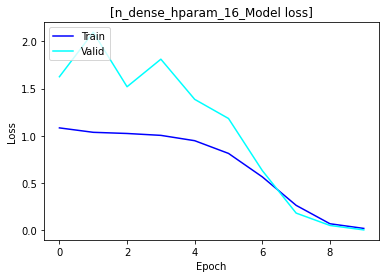

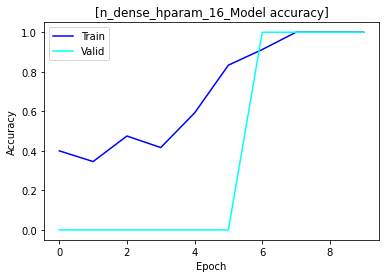

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_17 (Dense)             (None, 3)                

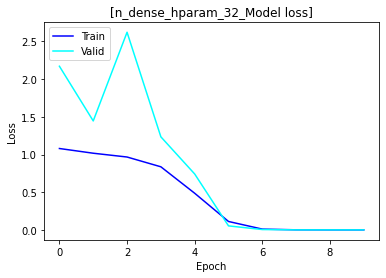

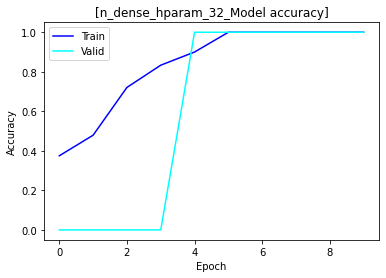

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

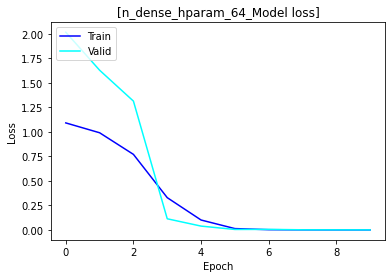

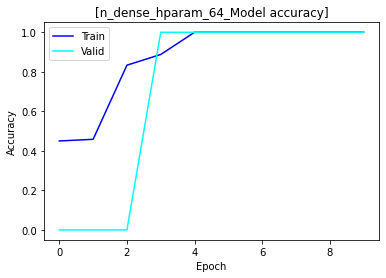

max 1.0
maxparam ['n_dense' 64 0.000949647044762969 1.0]
i n_dense best hyperparam 64
i n_dense best val_loss 0.000949647044762969
i n_dense best val_accuracy 1.0
i 3 key n_train_epoch hparam_list [10, 20, 30]
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________

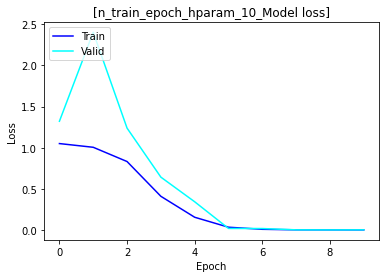

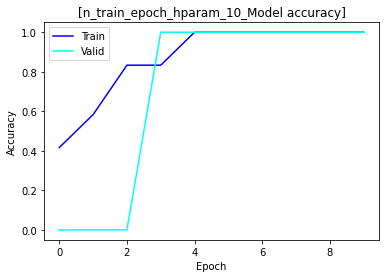

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

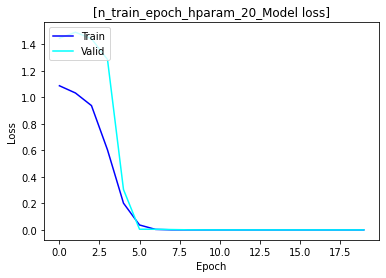

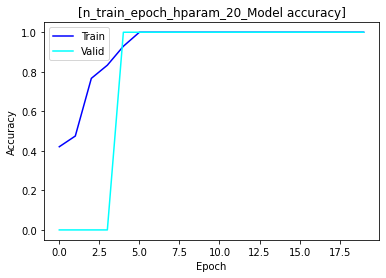

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

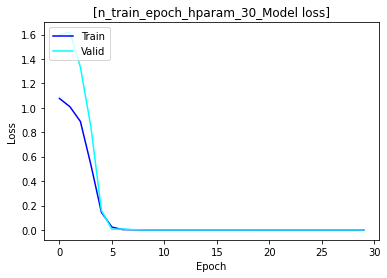

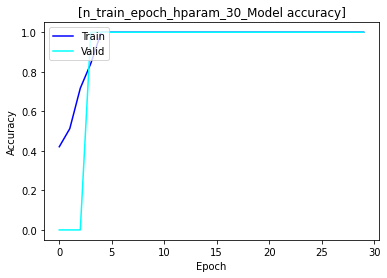

max 1.0
maxparam ['n_train_epoch' 30 0.00025781645672395825 1.0]
i n_train_epoch best hyperparam 30
i n_train_epoch best val_loss 0.00025781645672395825
i n_train_epoch best val_accuracy 1.0
i 4 key n_lr hparam_list [0.001, 0.01]
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_____________________

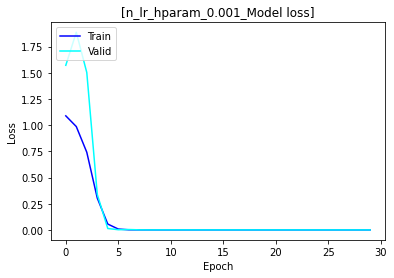

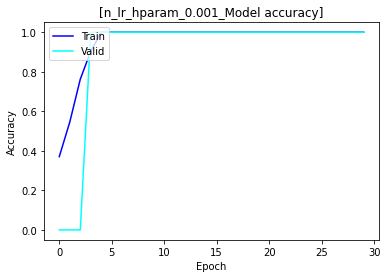

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_29 (Dense)             (None, 3)               

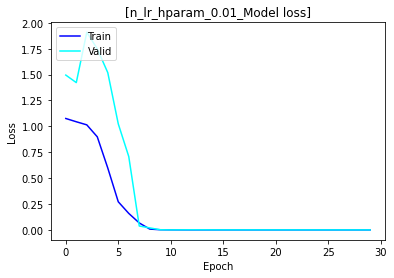

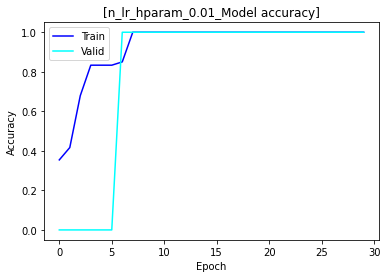

max 1.0
maxparam ['n_lr' 0.01 0.00035601475974544883 1.0]
i n_lr best hyperparam 0.01
i n_lr best val_loss 0.00035601475974544883
i n_lr best val_accuracy 1.0
i 5 key n_optimizer hparam_list [<keras.optimizer_v2.adam.Adam object at 0x7ff64c7a68e0>, <keras.optimizer_v2.rmsprop.RMSprop object at 0x7ff64c7a64c0>]
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatt

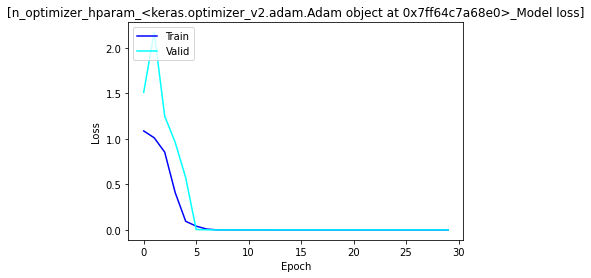

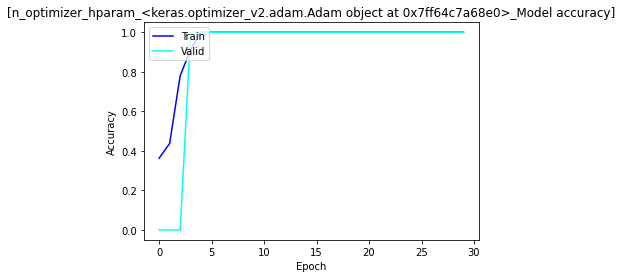

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_33 (Dense)             (None, 3)               

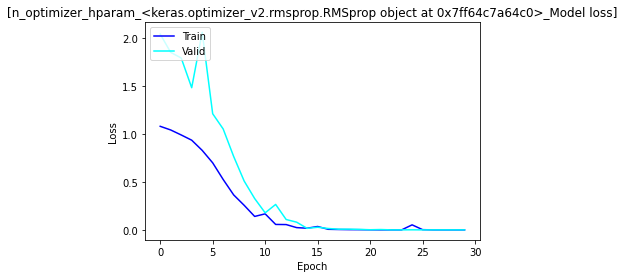

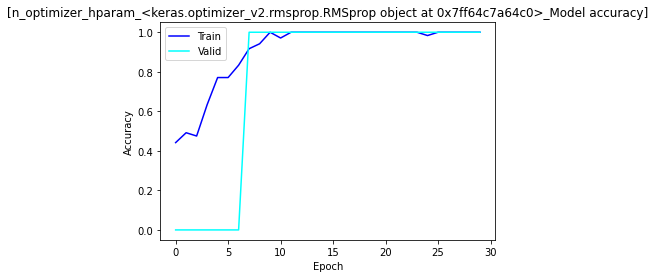

max 1.0
maxparam ['n_optimizer'
 0.0006011109799146652 1.0]
i n_optimizer best hyperparam <keras.optimizer_v2.rmsprop.RMSprop object at 0x7ff64c7a64c0>
i n_optimizer best val_loss 0.0006011109799146652
i n_optimizer best val_accuracy 1.0
0
best_hparam_list [['n_channel_1', 32, 1.7997987270355225, 0.0], ['n_channel_2', 64, 0.8718865513801575, 0.0], ['n_dense', 64, 0.000949647044762969, 1.0], ['n_train_epoch', 30, 0.00025781645672395825, 1.0], ['n_lr', 0.01, 0.00035601475974544883, 1.0], ['n_optimizer', <keras.optimizer_v2.rmsprop.RMSprop object at 0x7ff64c7a64c0>, 0.0006011109799146652, 1.0]]
최종 valid 성능:  valid loss 0.0006011109799146652 valid accuracy 1.0


In [17]:
#subhistory = []
history = []
best_hparam_list = []
#total_hparam_list = [n_channel_1_list,n_channel_2_list, n_dense_list, n_train_epoch_list, n_lr_list, n_optimizer_list]

# 약식 튜닝 : 전체 하이퍼파람을 모두 각가 대응시켜 for loop를 6겹 중복으로 할 경우, 시간이 너무 많이 걸려서, 
# 약식으로 6개 하이퍼파람별 for loop로 해서,독립적으로 best param을 코드로 best accuracy를 자동 선정하여,
# 순차적으로  다음 for loop에 입력하는 방식으로 함

prev_best_accuracy = 0

for i,(key, hparam_list) in enumerate(total_hparam_dict.items()):
    print("i",i,"key", key, "hparam_list", hparam_list)
    for ii, hparam in enumerate(hparam_list):
        if i == 0 or key == 'n_channel_1':
            n_channel_1 = hparam
        elif i == 1 or key == 'n_channel_2':    
            n_channel_2 = hparam
        elif i == 2 or key == 'n_dense':
            n_dense = hparam
        elif i == 3 or key == 'n_train_epoch':    
            n_train_epoch = int(hparam)
        elif i == 4 or key == 'n_lr':
            n_lr = hparam       
        elif i == 5 or key == 'n_optimizer':
            n_optimizer = hparam   

        # 학습/검증   
        model, subhistory = learning_with_simple_hyper_param_tuning(n_channel_1,n_channel_2,n_dense,n_train_epoch,n_lr,n_optimizer)
        
        subhistory= subhistory.history
        subhistory_df = pd.DataFrame(subhistory)
        # append
        history.append([key,hparam,subhistory_df])
        print("key",key,"hparam",hparam, "subhistory.keys()",subhistory.keys())  
        
        # 훈련 과정 시각화 (loss): train, valid
        plt.plot(subhistory['loss'],'blue')
        plt.plot(subhistory['val_loss'],'cyan')
        plt.title(f'[{key}_hparam_{hparam}_Model loss]')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Valid'], loc='upper left')
        plt.show()       

        # 훈련 과정 시각화 (accuracy): train, valid
        plt.plot(subhistory['accuracy'],'blue')
        plt.plot(subhistory['val_accuracy'],'cyan')
        plt.title(f'[{key}_hparam_{hparam}_Model accuracy]')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Train', 'Valid'], loc='upper left')
        plt.show()
               
    # best param
    innermaxarray = np.array([[sh[0],sh[1],sh[2].iat[-1,-2], sh[2].iloc[:,-1:].max().values[-1]] for sh in history],dtype=object)
    max = np.max(innermaxarray[:,-1:])
    print("max",max)
    maxparam = innermaxarray[innermaxarray[:,-1]==max]
    print("maxparam",maxparam[-1])
        
    print(f"i {key} best hyperparam", maxparam[-1][1])
    print(f"i {key} best val_loss",maxparam[-1][-2])
    print(f"i {key} best val_accuracy",maxparam[-1][-1])  
    # history 를 하이퍼파람끝날때마다 비움
    history = []

    # best param 집계
    best_hparam_list.append([key,maxparam[-1][1],maxparam[-1][-2],maxparam[-1][-1]])
   
    # hparam별 best param입력: 직전 best accuracy보다 높을때만, 아니면 기존 유지
    if maxparam[-1][-1] > prev_best_accuracy:
        if i == 0 or key == 'n_channel_1':
            n_channel_1 = maxparam[-1][1]            
        elif i == 1 or key == 'n_channel_2':    
            n_channel_2 = maxparam[-1][1]
        elif i == 2 or key == 'n_dense' :
            n_dense = maxparam[-1][1]
        elif i == 3 or key == 'n_train_epoch':    
            n_train_epoch = int(maxparam[-1][1])
        elif i == 4 or key == 'n_lr':
            n_lr = maxparam[-1][1] 
        elif i == 5 or key == 'n_optimizer':
            n_optimizer = hparam       

    # 직전 best_accuracy 비교위해 저장
    prev_best_accuracy = maxparam[-1][-1]
                            
print(len(history))
print("best_hparam_list",best_hparam_list)    
print("최종 valid 성능: ", "valid loss", best_hparam_list[-1][-2],"valid accuracy", best_hparam_list[-1][-1])
                 

### best hyper parameter

##### best_hparam_list: 
1. 'n_channel_1' =  32
2. 'n_channel_2' =  64
3. 'n_dense' =  64
4. 'n_train_epoch' =  30
5. 'n_lr' =  0.01
6. 'n_optimizer = <keras.optimizer_v2.rmsprop.RMSprop object at 0x7fdd201e64f0>  # RMSprop

best_hparam_list [['n_channel_1', 32, 1.7997987270355225, 0.0], ['n_channel_2', 64, 0.8718865513801575, 0.0], ['n_dense', 64, 0.000949647044762969, 1.0], ['n_train_epoch', 30, 0.00025781645672395825, 1.0], ['n_lr', 0.01, 0.00035601475974544883, 1.0], ['n_optimizer', <keras.optimizer_v2.rmsprop.RMSprop object at 0x7ff64c7a64c0>, 0.0006011109799146652, 1.0]]
최종 valid 성능:  valid loss 0.0006011109799146652 valid accuracy 1.0

##### 최종 valid 성능:  

최종 valid 성능:  valid loss 0.0006011109799146652 valid accuracy 1.0

In [18]:
### 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm1, y_test1, verbose=2)
print(f"최종 test_loss: {test_loss} ")
print(f"최종 test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.1042 - accuracy: 1.0000
최종 test_loss: 0.10422032326459885 
최종 test_accuracy: 1.0


##### 최종 test data 성능

최종 test_loss: 0.10422032326459885 

최종 test_accuracy: 1.0

##### test data Accuracy 가 100%라서, 프로젝트 마무리함    

### 회고

In [ ]:
본 프로젝트는 가위바위보 인식을위한 딥러닝모델을 맏릉어보는 프로젝트로서, 이미지데이터생성, 모델설계,학습,
테스트데이터로 성능평가 및 성능향상을 위한 모델업그레이드의 순서로 진행하였습니다.

1. 가위,바위,보 이미지데이터생성: 
    
    (1) train data: 본인의  손으로 촬영하었으며, 구글의 teachable machine를 이용하여, 가위 100장,바위100장,보 100장의 이미지를 다양한 각도및
    손바닥방향과 손등방향을 섞어서 손목까지 보이게 생성하였습니다.
    (2) test data: 본인의 가족의 손을 상기 (1)에서 처럼 동일한 배경에서 다양한 각도로 촬영하였습니다
    (3) 데이터생성상 교훈: 처음에는 test data로 Aiffel의 webcam없는 경우의 이미지300장, 노션에 올려진 같은 조원의 이미지 300장, 다른 조원 이미지 300장을 
        대상으로 테스트해보았으나, 이미지사이즈 늘이고 줄이는 과정에서, 이미지가 덮어써지고 하는 문제에다가, 가위바위보 인식하는 모델만들기인데,
        뒷 배경이 다르다 보니,뒷배경까지 다른 이미지들을 인식하는 과정을 거치려면 적어도 뒷배경이 다른 10명이상의 데이터를 모아서 학습시켜야 할 것 같은데,
        2~3일에 한번씩 프로젝트를 완료해야하는 수업중량상, 본 프로젝트의 목적과 다른 것으로 보여서, test data는 동일 뒷 배경으로 하기위해,
        가족의 손을 촬영하였습니다.  
        
2. 모델설계:
    모델은 Keras Sequential Model로 가장 기본적인 파라메터값으로 1차시도해보고, 결과가 저조하면 하이퍼파람 튜닝으로 
    성능향상을 시도해보고, 그래도 저조하면, batch normalization layer추가, regularization, layer수 증가등을 시도해보기로 계획했습니다.
    
    #1차 params 기본세팅: Input, conv2D 2개, MaxPooling 2개, dense 1개, Output 1개, 이미지size 28 *28로 고정
    
    n_channel_1 = 8
    n_channel_2 = 8     
    n_dense = 8         
    n_train_epoch = 5   
    n_lr = 0.001  # 학습율
    n_optimizer = 'adam'


3. 학습및 valid 검증:
    
    model.fit()내에 shuffle= True (default임)을 하여, 가위바위보가 trai, valid에 섞이도록 했고,
    split비율을 8:02로 하여, epoch 5 회로 학습하였습니다.
    학습결과를 Histoty에 담아서, loss, accuracy를 시각화하였습니다.
    
4. 1차 테스트 성능평가

   1차 test data로 검증해본 결과는 test_loss: 1.095088243484497,test_accuracy: 0.3333333432674408로 저조했습니다.

5. 성능향상시도: 하이퍼파람 튜닝  
   
    (1) Hyperparam을 sklearn으로 하려면, 딥러닝모델은 keras wrapper로 감싸야하는데,입력변수가 여러개일때 오류없이 하려면,
         tf2.7에있는 keras model을 써야하는데,, LMS교재는 tf2.6을 써서, 미사용.        
        
    (2) 약식 튜닝 : 전체 하이퍼파람을 모두 각r각 1:1 대응시켜 for loop를 6겹 중복으로 할 경우, 시간이 너무 많이 걸려서, 
        약식으로 6개 하이퍼파람별 for loop로 해서,독립적으로 best param을 코드로 best accuracy를 자동 선정한후, 
        순차적으로  다음 for loop에 선정된 best Hyperparam을 입력하는 방식으로 함() 
    (3) 필요함수생성 :    이를 편하게 하기 위해서 learning_with_simple_hyper_param_tuning()함수를 별도로 만들고,
        이를 돌리는 for loop 코드를 별도로 만들었습니다.
        
    (4)튜닝대상: 상기 2의 기본설정 parameter 6개
        
    (5)튜닝 결과: 튜닝결과에 param별로 loss, accuracy 시각화플로팅되도록 했슴
    
        - 최종 valid 성능:  valid loss 0.0006011109799146652 valid accuracy 1.0  
            
        - best_hparam: 
            1. 'n_channel_1' =  32
            2. 'n_channel_2' =  64
            3. 'n_dense' =  64
            4. 'n_train_epoch' =  30
            5. 'n_lr' =  0.01
            6. 'n_optimizer = <keras.optimizer_v2.rmsprop.RMSprop object at 0x7fdd201e64f0>  # RMSprop   
            
6. 2차(최종) 테스트성능평가: 튜닝된 하이퍼파람모델로 test data 최종성능평가 test accuracy 100%
    
    -최종 test_loss: 0.10422032326459885 
        
    - test_accuracy: 1.0
        
7. 결론:
    
    이미지사이즈가 56 *56을 넘어가면 기본모델만으로도 테스트 성능이 100%가 되어서, 다양한 사이즈로 해보다가,    
    LMS 교재상에 나온대로  28 * 28로 고정하고 처리한 것입니다.
    
    하이퍼파람 튜닝으로 2차테스트에서 test accuracy가 100%가 되어서, 규제화,배치노말레이어, 레이어수증가등의 시도는 생략했습니다.
    
    시간이 여유가 있다면, Aiffel 2기 20명조원들이 다양한 뒷배경속에서, 가위바위보를 촬영한 것 약 5000장이상으로 학습해보면 여러시도속에
    다양한 공부가 될듯하나, 시간관계상 어려울듯 싶고, 현재의 여건에서 데이터의 사이즈를 늘려보고 줄여보며, 해상도차이도 파악할수 있었고,
    덮여 쓰워지지않고 다양한 사이즈를 체험하려면, 교재상의 resize함수와 load_data함수를 다소 변경하여, 메모리상에서 바인딩한 변수로
    처리하는 것도 체험해보았습니다. 이를 통해 이미지 데이터에 대한 이해가 늘었고, CNN구조도 설계해보며, hyper param에대한 연습도 해봤으며,
    CNN을 쉽게 체험및 이해할수 있는 좋은 기회였습니다.
    

        
     